In [46]:
import pandas as pd
Book_Read = pd.read_excel("종이책_독서율__성인__20240116155143.xlsx")
print(Book_Read)
print("="*50)
A = Book_Read.loc[:]
A.head()


   통계분류(1)       통계분류(2)   사례수    읽음   안읽음
0       전체            소계  6000  40.7  59.3
1       성별            남성  2991  40.4  59.6
2      NaN            여성  3009  41.1  58.9
3      연령별        19~29세  1016  60.3  39.7
4      NaN        30~39세   964  56.3  43.7
5      NaN        40~49세  1123  44.4  55.6
6      NaN        50~59세  1173  33.9  66.1
7      NaN        60세 이상  1724  22.7  77.3
8      학력별         중졸 이하   900  12.0  88.0
9      NaN        고졸, 고퇴  2136  29.2  70.8
10     NaN         대재 이상  2964  57.7  42.3
11   가구소득별      200만원 미만   715  18.9  81.1
12     NaN   200~300만원미만   888  28.2  71.8
13     NaN   300~400만원미만  1412  39.3  60.7
14     NaN  400~500만원 미만  1521  46.0  54.0
15     NaN      500만원 이상  1464  54.8  45.2


,통계분류(1),통계분류(2),사례수,읽음,안읽음
0,전체,소계,6000,40.7,59.3
1,성별,남성,2991,40.4,59.6
2,NaN,여성,3009,41.1,58.9
3,연령별,19~29세,1016,60.3,39.7
4,NaN,30~39세,964,56.3,43.7


In [47]:
Book_Read.loc[0]


통계분류(1)      전체
통계분류(2)      소계
사례수        6000
읽음         40.7
안읽음        59.3
Name: 0, dtype: object

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
ratio=[A['읽음'],A['안읽음']]
labels = ["Read", "N_Read"]
wedgeprops = {"width":0.8, "edgecolor": "k", "linewidth" : 1}
plt.pie(ratio, labels = labels, shadow=True, autopct="%.1f%%", wedgeprops=wedgeprops)
plt.show()

In [64]:
B=Book_Read.loc[8:10]

B

,통계분류(1),통계분류(2),사례수,읽음,안읽음
8,학력별,중졸 이하,900,12.0,88.0
9,NaN,"고졸, 고퇴",2136,29.2,70.8
10,NaN,대재 이상,2964,57.7,42.3


In [ ]:
B=Book_Read.loc[8:10]

ratio_b=[B['사례수'][8],B['사례수'][9],B['사례수'][10]]
labels_b = ["middle", "high",'uni']
wedgeprops_b = {"width":0.8, "edgecolor": "k", "linewidth" : 1}
plt.pie(ratio_b, labels = labels_b, shadow=True, autopct="%.1f%%", wedgeprops=wedgeprops_b)
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'stacked'

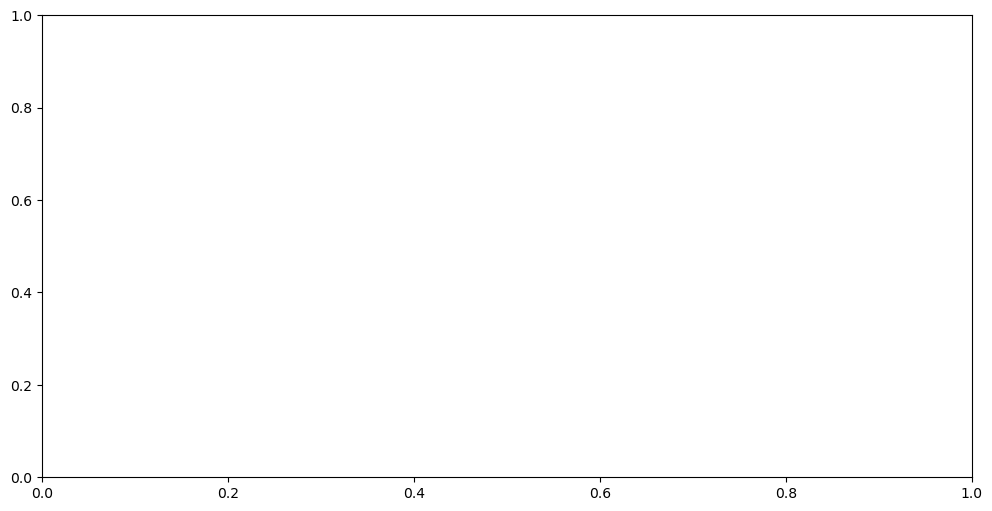

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


middle = [12,88]
high = [29.2,70.8]
uni = [57.7,42.3]
read = ['read','N_read']

df = pd.DataFrame({'middle' : middle, 'high' : high, 'uni' : uni}, index = read)
df


# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(2)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['middle'], bar_width, alpha=0.4, label='middle')

b2 = plt.bar(index + bar_width, df['high'], bar_width, alpha=0.4, label='high')

b3 = plt.bar(index + 2 * bar_width, df['uni'], bar_width, alpha=0.4, label='uni')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 2 + bar_width, 1), read)
plt.grid(axis='x')
# x축, y축 이름 및 범례 설정
plt.xlabel('read', size = 13)
plt.ylabel('grade_percent', size = 13)
plt.legend()
plt.show()


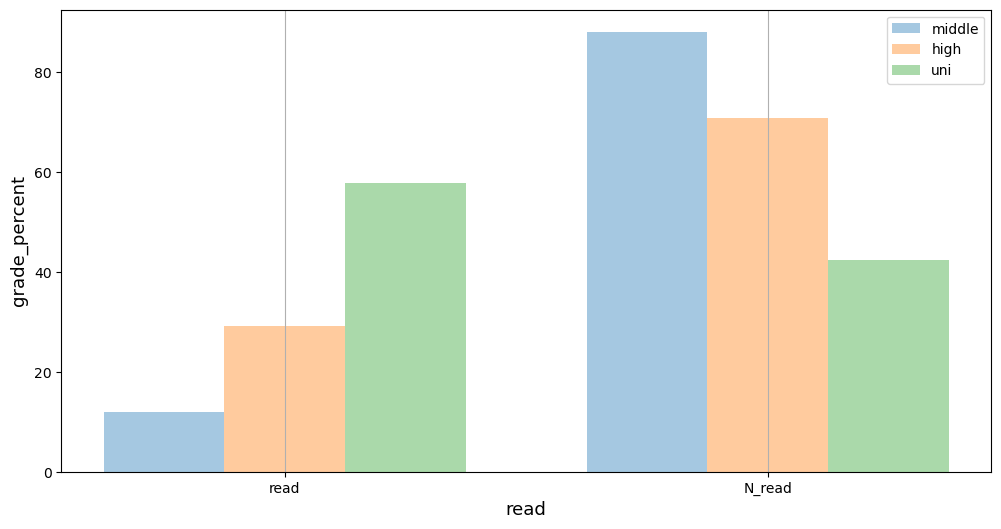

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


middle = [12,88]
high = [29.2,70.8]
uni = [57.7,42.3]
read = ['read','N_read']

df = pd.DataFrame({'middle' : middle, 'high' : high, 'uni' : uni}, index = read)
df

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(2)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['middle'], bar_width, alpha=0.4, label='middle')

b2 = plt.bar(index + bar_width, df['high'], bar_width, alpha=0.4, label='high')

b3 = plt.bar(index + 2 * bar_width, df['uni'], bar_width, alpha=0.4, label='uni')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 2 + bar_width, 1), read)
plt.grid(axis='x')
# x축, y축 이름 및 범례 설정
plt.xlabel('read', size = 13)
plt.ylabel('grade_percent', size = 13)
plt.legend()
plt.show()


In [86]:
physicla_data=pd.read_csv("2022년 국민생활체육조사_샘플데이터.csv")
physicla_table=pd.read_csv("2022년 국민생활체육조사 코드북.csv")
physicla_table

,코드구분,내용
0,ID,ID
1,AREA,지역
2,CODE1,조사구번호
3,CODE3,읍/면/동
4,APT,주거유형
...,...,...
209,DQ04,직업유무
210,DQ04A,직업유무
211,DQ041,무직자 상태
212,XDQ041,기타
